In [1]:
%matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,20009.0,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,20009.0,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,20009.0,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,20009.0,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,20009.0,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW


In [5]:
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
housing_df2.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,YEAR,MONTH
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2003.0,11.0
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2000.0,8.0
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2016.0,6.0
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2006.0,7.0
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,NaN,NaN


In [6]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]
residential_df.count().head()

BATHRM       57900
HF_BATHRM    57900
HEAT         57900
AC           57900
NUM_UNITS    57900
dtype: int64

In [7]:
remodel_df = residential_df[['YR_RMDL','WARD','QUADRANT']]
remodel_df.head()

,YR_RMDL,WARD,QUADRANT
0,1988.0,Ward 2,NW
2,2009.0,Ward 2,NW
3,2003.0,Ward 2,NW
5,NaN,Ward 2,NW
7,2011.0,Ward 2,NW


In [58]:
remodel_df = remodel_df[remodel_df.YR_RMDL.notnull()]
remodel_df = remodel_df[remodel_df.QUADRANT.notnull()]
remodel_df = remodel_df[~(remodel_df['YR_RMDL'] < 1992.0)] 
remodel_df = remodel_df[~(remodel_df['YR_RMDL'] > 2017.0)]

remodel_counts = remodel_df['YR_RMDL'].value_counts()
remodel_counts

2011.0    1949
2010.0    1866
2013.0    1827
2012.0    1806
2004.0    1776
2014.0    1738
2005.0    1721
2015.0    1637
2006.0    1621
2007.0    1490
2008.0    1415
2016.0    1406
2009.0    1369
2017.0    1328
2003.0    1263
2002.0     887
2000.0     756
2001.0     675
1992.0     392
1998.0     235
1995.0     228
1999.0     214
1996.0     180
1994.0     144
1997.0      89
1993.0      84
Name: YR_RMDL, dtype: int64

In [60]:
remodel_quad_df = remodel_df[['YR_RMDL','QUADRANT']]
remodel_quad_df

,YR_RMDL,QUADRANT
2,2009.0,NW
3,2003.0,NW
7,2011.0,NW
8,2008.0,NW
14,2000.0,NW
16,2006.0,NW
19,2013.0,NW
20,2009.0,NW
22,2010.0,NW
23,2010.0,NW


In [ ]:
remodel_year_df = pd.DataFrame(data = remodel_counts)
remodel_year_df2 = remodel_year_df.sort_index(ascending=True)

In [56]:
remodel_quad = remodel_df.groupby('QUADRANT')['YR_RMDL'].value_counts()
remodel_quad

QUADRANT  YR_RMDL
NE        2011.0     632
          2013.0     599
          2004.0     590
          2010.0     575
          2014.0     566
          2012.0     544
          2007.0     513
          2005.0     506
          2015.0     493
          2006.0     488
          2016.0     426
          2008.0     412
          2003.0     402
          2017.0     399
          2009.0     396
          2002.0     229
          2000.0     163
          2001.0     130
          1992.0     102
          1998.0      53
          1994.0      39
          1995.0      39
          1996.0      38
          1999.0      38
          1997.0      17
          1993.0      14
NW        2012.0     951
          2010.0     948
          2011.0     946
          2004.0     932
                    ... 
SE        1998.0      45
          1995.0      39
          1999.0      23
          1996.0      19
          1994.0      17
          1993.0      10
          1997.0       8
SW        2017.0      27
       

In [9]:
remodel_year_df = pd.DataFrame(data = remodel_counts)
remodel_year_df2 = remodel_year_df.sort_index(ascending=True)
remodel_year_df2 = remodel_year_df2.rename(columns={'YR_RMDL': 'Remodel Count'})
remodel_year_df2

,Remodel Count
1992.0,393
1993.0,84
1994.0,144
1995.0,228
1996.0,180
1997.0,89
1998.0,235
1999.0,214
2000.0,757
2001.0,675


In [10]:
remodel_df.head(10)

,YR_RMDL,WARD,QUADRANT
2,2009.0,Ward 2,NW
3,2003.0,Ward 2,NW
7,2011.0,Ward 2,NW
8,2008.0,Ward 2,NW
14,2000.0,Ward 2,NW
16,2006.0,Ward 2,NW
19,2013.0,Ward 2,NW
20,2009.0,Ward 2,NW
22,2010.0,Ward 2,NW
23,2010.0,Ward 2,NW


In [11]:
remodel_ward_df = remodel_df[['YR_RMDL','WARD']]

In [12]:
remodel_ward_1 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 1']
remodel_ward_1df = remodel_ward_1.groupby('YR_RMDL')['WARD'].count()
remodel_ward_1pd = pd.DataFrame(data = remodel_ward_1df)
remodel_ward_1pd = remodel_ward_1pd.rename(columns={'WARD': 'Ward 1'})
remodel_ward_1pd.head()

,Ward 1
YR_RMDL,
1992.0,34
1993.0,5
1994.0,5
1995.0,15
1996.0,5


In [13]:
remodel_ward_1 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 1']
remodel_ward_1df = remodel_ward_1.groupby('YR_RMDL')['WARD'].count()
remodel_ward_1pd = pd.DataFrame(data = remodel_ward_1df)
remodel_ward_1pd = remodel_ward_1pd.rename(columns={'WARD': 'Ward 1'})
remodel_ward_1pd.head()

,Ward 1
YR_RMDL,
1992.0,34
1993.0,5
1994.0,5
1995.0,15
1996.0,5


In [14]:
remodel_ward_2 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 2']
remodel_ward_2df = remodel_ward_2.groupby('YR_RMDL')['WARD'].count()
remodel_ward_2pd = pd.DataFrame(data = remodel_ward_2df)
remodel_ward_2pd = remodel_ward_2pd.rename(columns={'WARD': 'Ward 2'})
remodel_ward_2pd.head()

,Ward 2
YR_RMDL,
1992.0,27
1993.0,6
1994.0,15
1995.0,30
1996.0,19


In [15]:
remodel_ward_3 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 3']
remodel_ward_3df = remodel_ward_3.groupby('YR_RMDL')['WARD'].count()
remodel_ward_3pd = pd.DataFrame(data = remodel_ward_3df)
remodel_ward_3pd = remodel_ward_3pd.rename(columns={'WARD': 'Ward 3'})
remodel_ward_3pd.head()

,Ward 3
YR_RMDL,
1992.0,73
1993.0,31
1994.0,44
1995.0,68
1996.0,56


In [16]:
remodel_ward_4 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 4']
remodel_ward_4df = remodel_ward_4.groupby('YR_RMDL')['WARD'].count()
remodel_ward_4pd = pd.DataFrame(data = remodel_ward_4df)
remodel_ward_4pd = remodel_ward_4pd.rename(columns={'WARD': 'Ward 4'})
remodel_ward_4pd.head()

,Ward 4
YR_RMDL,
1992.0,75
1993.0,16
1994.0,22
1995.0,30
1996.0,27


In [17]:
remodel_ward_5 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 5']
remodel_ward_5df = remodel_ward_5.groupby('YR_RMDL')['WARD'].count()
remodel_ward_5pd = pd.DataFrame(data = remodel_ward_5df)
remodel_ward_5pd = remodel_ward_5pd.rename(columns={'WARD': 'Ward 5'})
remodel_ward_5pd.head()

,Ward 5
YR_RMDL,
1992.0,57
1993.0,3
1994.0,6
1995.0,10
1996.0,12


In [18]:
remodel_ward_6 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 6']
remodel_ward_6df = remodel_ward_6.groupby('YR_RMDL')['WARD'].count()
remodel_ward_6pd = pd.DataFrame(data = remodel_ward_6df)
remodel_ward_6pd = remodel_ward_6pd.rename(columns={'WARD': 'Ward 6'})
remodel_ward_6pd.head()

,Ward 6
YR_RMDL,
1992.0,51
1993.0,20
1994.0,41
1995.0,63
1996.0,27


In [19]:
remodel_ward_7 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 7']
remodel_ward_7df = remodel_ward_7.groupby('YR_RMDL')['WARD'].count()
remodel_ward_7pd = pd.DataFrame(data = remodel_ward_7df)
remodel_ward_7pd = remodel_ward_7pd.rename(columns={'WARD': 'Ward 7'})
remodel_ward_7pd.head()

,Ward 7
YR_RMDL,
1992.0,42
1993.0,2
1994.0,9
1995.0,9
1996.0,29


In [20]:
remodel_ward_8 = remodel_ward_df[remodel_ward_df['WARD'] == 'Ward 8']
remodel_ward_8df = remodel_ward_8.groupby('YR_RMDL')['WARD'].count()
remodel_ward_8pd = pd.DataFrame(data = remodel_ward_8df)
remodel_ward_8pd = remodel_ward_8pd.rename(columns={'WARD': 'Ward 8'})
remodel_ward_8pd.head()

,Ward 8
YR_RMDL,
1992.0,34
1993.0,1
1994.0,2
1995.0,3
1996.0,5


In [21]:
remodel_merge_1 = remodel_ward_1pd.join(remodel_ward_2pd,how='inner')
remodel_merge_2 = remodel_merge_1.join(remodel_ward_3pd,how='inner')
remodel_merge_3 = remodel_merge_2.join(remodel_ward_4pd,how='inner')
remodel_merge_4 = remodel_merge_3.join(remodel_ward_5pd,how='inner')
remodel_merge_5 = remodel_merge_4.join(remodel_ward_6pd,how='inner')
remodel_merge_6 = remodel_merge_5.join(remodel_ward_7pd,how='inner')
remodel_merge_df = remodel_merge_6.join(remodel_ward_8pd,how='inner')
remodel_merge_df

,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8
YR_RMDL,,,,,,,,
1992.0,34,27,73,75,57,51,42,34
1993.0,5,6,31,16,3,20,2,1
1994.0,5,15,44,22,6,41,9,2
1995.0,15,30,68,30,10,63,9,3
1996.0,5,19,56,27,12,27,29,5
1998.0,10,26,70,25,5,79,19,1
1999.0,22,32,62,26,12,42,12,6
2000.0,71,122,155,76,58,221,35,19
2001.0,72,95,171,65,77,147,30,18


In [22]:
remodel_merge_df2 = remodel_merge_df.drop(remodel_merge_df.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])
remodel_merge_df2

,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8
YR_RMDL,,,,,,,,
2007.0,140,132,182,242,220,351,180,43
2008.0,161,136,210,186,214,329,125,58
2009.0,165,134,172,224,171,358,117,34
2010.0,201,126,169,378,284,401,223,90
2011.0,216,101,226,332,327,434,235,79
2012.0,164,112,228,388,300,330,210,76
2013.0,185,98,191,349,337,377,195,100
2014.0,145,93,180,389,299,324,214,96
2015.0,160,77,180,380,301,239,203,100


In [23]:
ward_1 = remodel_merge_df2['Ward 1'].sum()
ward_2 = remodel_merge_df2['Ward 2'].sum()
ward_3 = remodel_merge_df2['Ward 3'].sum()
ward_4 = remodel_merge_df2['Ward 4'].sum()
ward_5 = remodel_merge_df2['Ward 5'].sum()
ward_6 = remodel_merge_df2['Ward 6'].sum()
ward_7 = remodel_merge_df2['Ward 7'].sum()
ward_8 = remodel_merge_df2['Ward 8'].sum()
print(ward_1,ward_2,ward_3,ward_4,ward_5,ward_6,ward_7,ward_8)

1783 1087 1983 3452 2906 3449 2199 1009


<IPython.core.display.Javascript object>


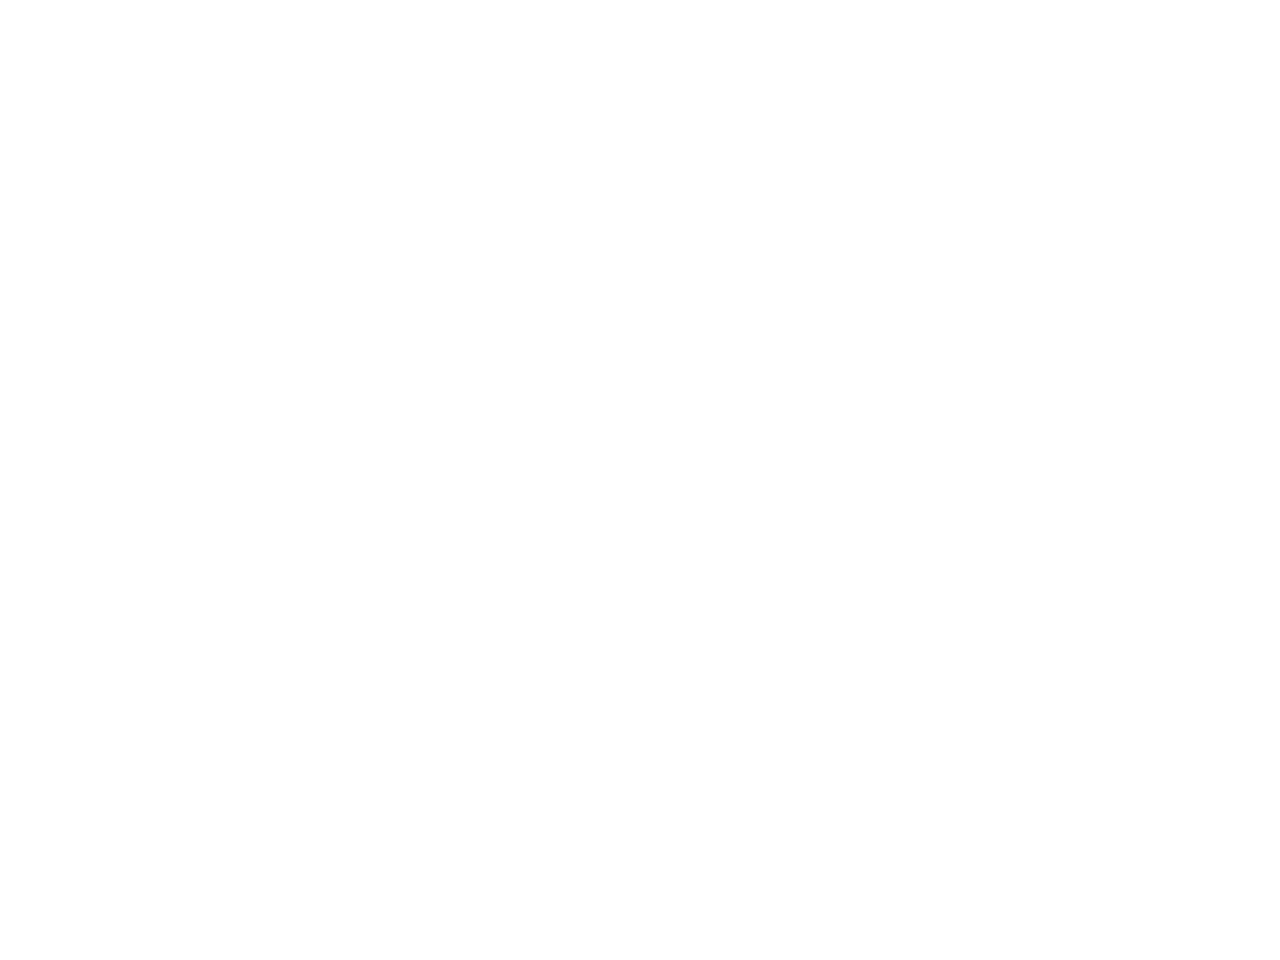

([<matplotlib.patches.Wedge at 0x11d91dac8>,
 [Text(-1.0196267037468147, 0.41274857359705736, 'Ward 1'),
  Text(-1.0920935254395183, -0.13165003491486235, 'Ward 2'),
  Text(-0.8691641800986715, -0.6742059240568896, 'Ward 3'),
  Text(0.04897963864914338, -1.0989090021461283, 'Ward 4'),
  Text(1.0095434102123269, -0.43683189317730187, 'Ward 5'),
  Text(0.8349332044975363, 0.7161609763366582, 'Ward 6'),
  Text(-0.1439304112198924, 1.0905430008606138, 'Ward 7'),
  Text(-0.7046436255743752, 0.8446758910596419, 'Ward 8')],
 [Text(-0.5561600202255352, 0.2251355855983949, '10.0%'),
  Text(-0.5956873775124645, -0.07180910995356127, '6.1%'),
  Text(-0.4740895527810935, -0.36774868584921244, '11.1%'),
  Text(0.026716166535896386, -0.5994049102615245, '19.3%'),
  Text(0.5506600419339964, -0.23827194173307373, '16.3%'),
  Text(0.45541811154411066, 0.39063325981999536, '19.3%'),
  Text(-0.0785074970290322, 0.594841636833062, '12.3%'),
  Text(-0.3843510684951137, 0.4607323042143501, '5.6%')])

In [46]:
labels = 'Ward 1', 'Ward 2', 'Ward 3', 'Ward 4','Ward 5', 'Ward 6', 'Ward 7', 'Ward 8'
sizes = [ward_1, ward_2, ward_3, ward_4, ward_5, ward_6, ward_7, ward_8]
colors = ["royalblue", "orange", "green", "red", "mediumpurple", "saddlebrown", "orchid", "dimgray"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

In [47]:
plt.title("Residential Remodels by Ward in Washington D.C. (2007 - 2017)")
plt.savefig("Images/remodels_in_DC_ward_piechart.png")
plt.clf()

In [39]:
remodel_merge_df3 = remodel_merge_df.drop(remodel_merge_df.index[[0,1,2,3,4,14,15,16,17,18,19,20,21,22,23,24]])
remodel_merge_df3

,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8
YR_RMDL,,,,,,,,
1998.0,10,26,70,25,5,79,19,1
1999.0,22,32,62,26,12,42,12,6
2000.0,71,122,155,76,58,221,35,19
2001.0,72,95,171,65,77,147,30,18
2002.0,79,95,191,115,109,232,56,11
2003.0,118,121,223,154,207,274,120,48
2004.0,182,154,258,267,287,398,170,65
2005.0,197,134,243,246,263,432,127,83
2006.0,157,135,205,292,234,338,183,80


In [40]:
ward_1_df = remodel_merge_df3['Ward 1'].sum()
ward_2_df = remodel_merge_df3['Ward 2'].sum()
ward_3_df = remodel_merge_df3['Ward 3'].sum()
ward_4_df = remodel_merge_df3['Ward 4'].sum()
ward_5_df = remodel_merge_df3['Ward 5'].sum()
ward_6_df = remodel_merge_df3['Ward 6'].sum()
ward_7_df = remodel_merge_df3['Ward 7'].sum()
ward_8_df = remodel_merge_df3['Ward 8'].sum()
print(ward_1_df,ward_2_df,ward_3_df,ward_4_df,ward_5_df,ward_6_df,ward_7_df,ward_8_df)

908 914 1578 1266 1252 2163 752 331


In [44]:
labels2 = 'Ward 1', 'Ward 2', 'Ward 3', 'Ward 4','Ward 5', 'Ward 6', 'Ward 7', 'Ward 8'
sizes2 = [ward_1_df, ward_2_df, ward_3_df, ward_4_df, ward_5_df, ward_6_df, ward_7_df, ward_8_df]
colors2 = ["royalblue", "orange", "green", "red", "mediumpurple", "saddlebrown", "orchid", "dimgray"]

plt.pie(sizes2, labels=labels2, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x11daaa5c0>,
 [Text(-1.018711393744652, 0.4150025256005427, 'Ward 1'),
  Text(-1.0690537582417672, -0.25908311791614974, 'Ward 2'),
  Text(-0.5067151638513087, -0.9763399729208785, 'Ward 3'),
  Text(0.523743866078511, -0.9673119262911706, 'Ward 4'),
  Text(1.0755283578408712, -0.2307352410883942, 'Ward 5'),
  Text(0.6314144479641363, 0.9007307005438114, 'Ward 6'),
  Text(-0.41608887727740973, 1.0182681602633095, 'Ward 7'),
  Text(-0.7571688125783564, 0.797931945255159, 'Ward 8')],
 [Text(-0.5556607602243555, 0.22636501396393235, '9.9%'),
  Text(-0.5831202317682366, -0.14131806431789984, '10.0%'),
  Text(-0.27639008937344106, -0.5325490761386609, '17.2%'),
  Text(0.2856784724064605, -0.5276246870679111, '13.8%'),
  Text(0.586651831549566, -0.125855586048215, '13.7%'),
  Text(0.3444078807077106, 0.4913076548420789, '23.6%'),
  Text(-0.22695756942404163, 0.5554189965072597, '8.2%'),
  Text(-0.4130011704972853, 0.43523560650281395, '3.6%')])

In [45]:
plt.title("Residential Remodels by Ward in Washington D.C. (1997 - 2006)")
plt.show()
plt.savefig("Images/remodels_in_DC_ward_piechart2.png")
